# Algorithme de Kruskal

**Idée** : On part du graphe $T=(V, \emptyset)$ et on ajoute tour à tour une nouvelle arête de plus petit poids qui ne crée pas de cycles (i.e. qui connecte deux composantes connexes différentes).

**Invariant** : À l'étape $i$, le graphe $T$ est acyclique avec $i$ arêtes de poids minimal

- [Algorithme de Kruskal](https://fr.wikipedia.org/wiki/Algorithme_de_Kruskal)
- [Union Find](https://fr.wikipedia.org/wiki/Union-find)

Dans ce qui suit nous exécutons à la main, l'algorithme de Kruskal

In [1]:
from graph_networkx import Graph, examples
import networkx
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from graph import Graph, examples

G = examples.disconnected()
G.show()

import networkx
import matplotlib
import matplotlib.pyplot as plt

In [3]:
## On part d'un graphe valué et on fixe un dessin
G = examples.cours_1_reseau()
GNX = G.networkx()
layout = networkx.planar_layout(GNX)
edges_weight = {(u, v) : w for u, v, w in G.edges()}

/opt/conda/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


In [4]:
## On visulise la progression de l'algorithme en affectant à chaque arête un état représenté par une couleur
from enum import Enum, unique
@unique
class Status(Enum):
    AFAIRE = 0
    GARDEE = 1
    SUPRIMEE = 2
    ENCOURS = 3
colors_code = { 
    Status.AFAIRE : 'black',
    Status.GARDEE : 'green',
    Status.SUPRIMEE : 'lightgray',
    Status.ENCOURS : 'red'
}

In [5]:
def show_kruskal(status):
    plt.figure()
    colors = [colors_code[status[u,v]] for (u, v) in GNX.edges()]
    networkx.draw(GNX, layout, edge_color = colors, width=3, linewidths=1,
                  node_size=500, node_color = 'lightgray', alpha=0.9,
                  labels = {node : node for node in G.vertices()})
    networkx.draw_networkx_edge_labels(GNX, layout, edge_labels= edges_weight, font_color='black')
    plt.axis('off')
    plt.show()

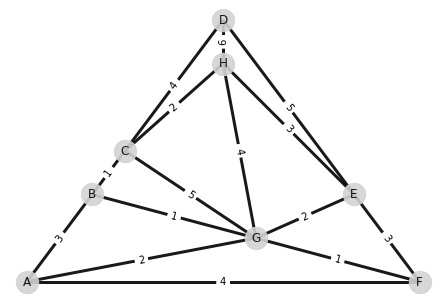

In [6]:
# Au début toutes les arêtes sont marquée "à faire"
edges_status = {(u, v) : Status.AFAIRE for u, v, _ in G.edges()}
show_kruskal(edges_status)

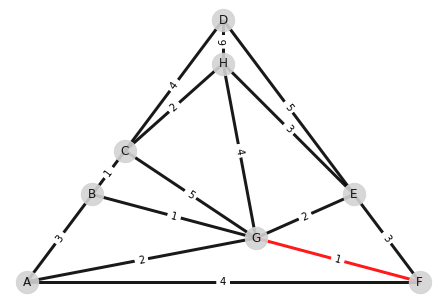

In [7]:
# On choisit l'une des arêtes de poids minimum
edges_status["F", "G"] = Status.ENCOURS
show_kruskal(edges_status)

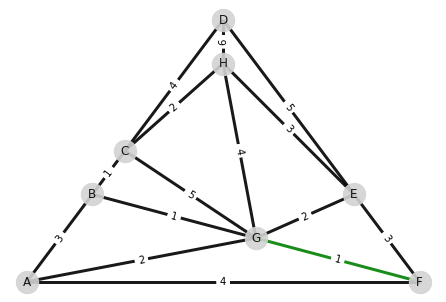

In [8]:
# Elle ne crée pas de cycle. On la garde
edges_status["F", "G"] = Status.GARDEE
show_kruskal(edges_status)

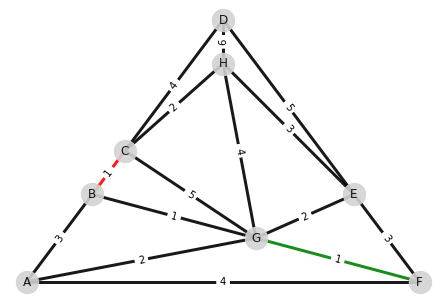

In [9]:
# On choisit l'une des arêtes de poids minimum
edges_status["B", "C"] = Status.ENCOURS
show_kruskal(edges_status)

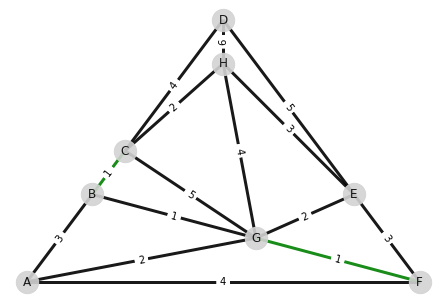

In [10]:
# Elle ne crée pas de cycle. On la garde
edges_status["B", "C"] = Status.GARDEE
show_kruskal(edges_status)

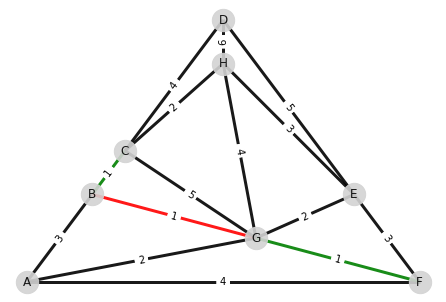

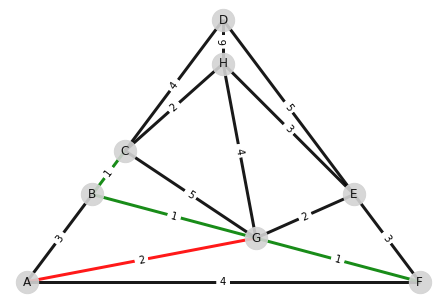

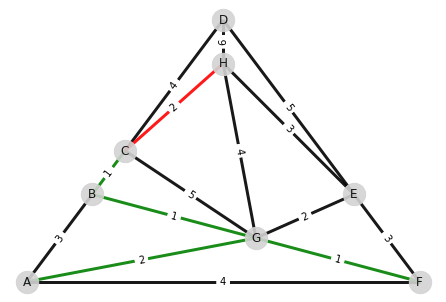

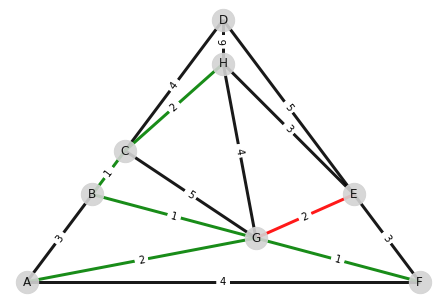

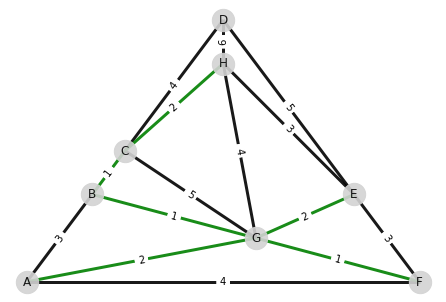

In [11]:
# L'algorithme se continue ainsi
edges_status["B", "G"] = Status.ENCOURS
show_kruskal(edges_status)
edges_status["B", "G"] = Status.GARDEE
edges_status["A", "G"] = Status.ENCOURS
show_kruskal(edges_status)
edges_status["A", "G"] = Status.GARDEE
edges_status["C", "H"] = Status.ENCOURS
show_kruskal(edges_status)
edges_status["C", "H"] = Status.GARDEE
edges_status["E", "G"] = Status.ENCOURS
show_kruskal(edges_status)
edges_status["E", "G"] = Status.GARDEE
show_kruskal(edges_status)

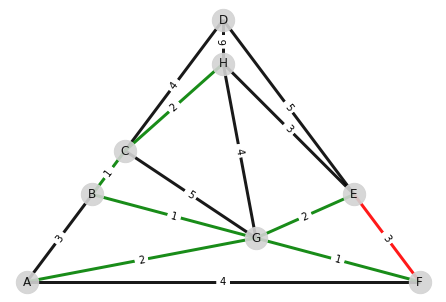

In [12]:
# On Passe maintenant aux arêtes de poids 3
edges_status["E", "F"] = Status.ENCOURS
show_kruskal(edges_status)

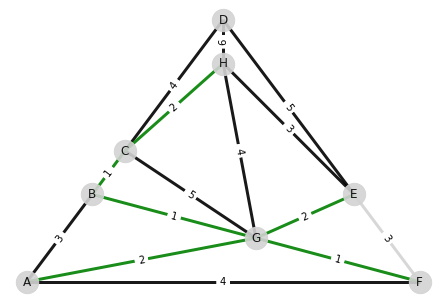

In [13]:
# L'arête E - F crée un Cycle, on la supprime
edges_status["E", "F"] = Status.SUPRIMEE
show_kruskal(edges_status)

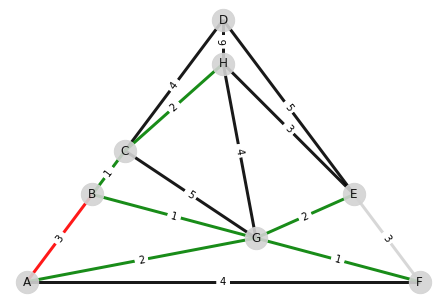

In [14]:
# On Passe maintenant a A - B
edges_status["A", "B"] = Status.ENCOURS
show_kruskal(edges_status)

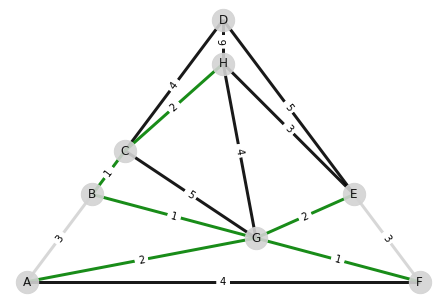

In [15]:
# L'arête A - B crée un Cycle, on la supprime
edges_status["A", "B"] = Status.SUPRIMEE
show_kruskal(edges_status)

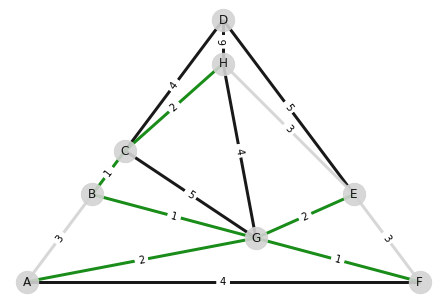

In [16]:
# Idem pour E - H
edges_status["E", "H"] = Status.SUPRIMEE
show_kruskal(edges_status)

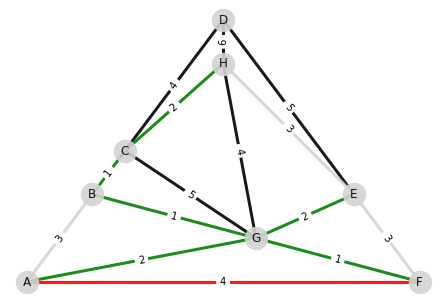

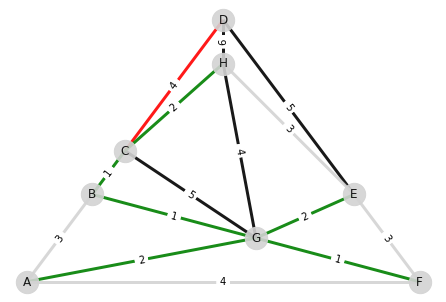

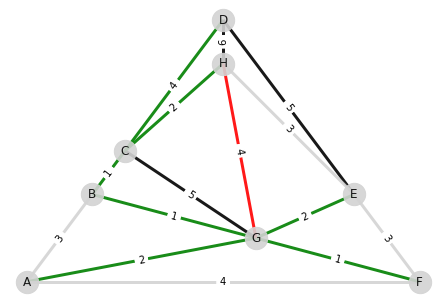

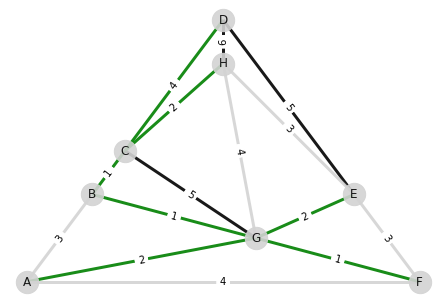

In [17]:
# L'algorithme se poursuit
edges_status["A", "F"] = Status.ENCOURS
show_kruskal(edges_status)
edges_status["A", "F"] = Status.SUPRIMEE
edges_status["C", "D"] = Status.ENCOURS
show_kruskal(edges_status)
edges_status["C", "D"] = Status.GARDEE
edges_status["G", "H"] = Status.ENCOURS
show_kruskal(edges_status)
edges_status["G", "H"] = Status.SUPRIMEE
show_kruskal(edges_status)

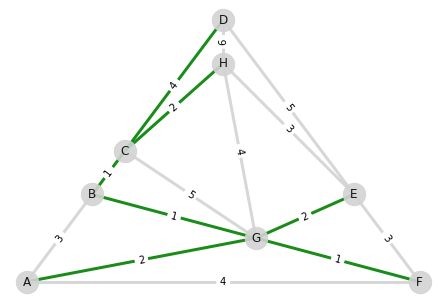

In [18]:
# On pourrait continuer jusqu'à ce que l'on ai vu toutes les arêtes...
# On remarque que l'on a choisi 7 arêtes dans un graphe à 8 sommets. On peut donc s'arrêter dès maintenant.
edges_status["C", "G"] = Status.SUPRIMEE
edges_status["D", "E"] = Status.SUPRIMEE
edges_status["D", "H"] = Status.SUPRIMEE
show_kruskal(edges_status)

On a calculé un arbre couvrant de poids 13 du graphe.

L'invariant de l'algorithme est le suivant:

À chaque étape, le graphe des arêtes choisies est un graphe partiel acyclique de $G$ de poids minimum 

**Exercice 2.** Appliquer à la main l'algorithme de Kruskal au deux graphes suivants. On donnera un arbre couvrant de **poids minimal** et un arbre couvrant de **poids maximal**. Pour ce dernier on applique le même algorithme mais en choissant un arête de plus fort poids.

<img src="media/arb-001.jpg" width="600" height="600" />

Donner le poids de l'arbre couvrant obtenu.

Le poid est de : 34  et le poids maximal est :63

<img src="media/arb-002.jpg" width="600" height="600" />

Donner le poids de l'arbre couvrant obtenu.

Le poid est de : 32 et le poids maximal est :55

Expliquer pourquoi l'invariant est conservé.

**Invariant** : À l'étape $i$, le graphe $T$ est acyclique avec $i$ arêtes de poids minimal
L’´etape d’initialisation est ´evident puisque tout arbre couvrant contient
la foret couvrante sans aretes<br>
Supposons que la proposition est vraie avant l’ajout d’une arete e et soit
T l’arbre couvrant de poids minimal qui contient F a ce moment la. Si
e ∈ E(T), F + e est encore inclus dans T et la propriete reste vraie apres
l’ajout de e.<br>

Si e /∈ E(T), T +e contient un cycle. Il y a donc une arete f qui appartient
a T mais pas a F + e puisque celui-ci est acyclique. Alors T − e + f est
connexe, couvrant et contient n − 1 aretes.<br>

Pa minimalité de T, T −e+f est de poids au moins egal<br>
a T. Ceci n’est possible que si le poids de e est inf´erieur au poids de f.
Or, f n’appartient pas a F + e, donc est consid´er´e par l’algorithme apres
e, ce qui implique que e et f ont en fait le mˆeme poids. Par consequent,
T − e + f est aussi un arbre de poids minimal et il contient F + e. La
propri´et´e est donc bien v´erifi´ee apres l’ajout de e.

## Stucture de donnée 'Union-Find'

Dans l'algorithme de Kruskal, on a besoin de savoir en permanence si les deux extrémités de l'arête considérée sont  dans la même composante connexe. Il serait très inefficace de refaire à chaque fois un parcours. On a donc besoin d'une structure de donnée qui permet de maintenir les composantes connexes du graphe partiel au cours de l'algorithme. C'est la structure [Union Find](https://fr.wikipedia.org/wiki/Union-find).

C'est une structure de données qui représente une partition d'un ensemble fini. On rappelle qu'une partition d'un ensemble $E$ est un ensemble de parties non vides de $E$ deux à deux disjointes et dont l'union est $E$. Dans notre application la partition est l'ensemble des composantes connexes de $V$.

L'idée d'union find est de choisir dans chaque composante connexe un sommet dit "canonique". On va ensuite implémenter les deux méthodes suivantes:
- `find(v)` : quel est le sommet canonique de la composante connexe d'un sommet $v$ donné.
- `union(u, v)` : mettre à jour la structure de donnée pour réunir les composantes des sommets canoniques $u$ et $v$.  

Pour ceci, on va stocker une forêt où chaque arbre est un chaînage d'une composante connexe qui pointe vers le sommet canonique.

Dans une telle forêt, le représentant de chaque classe est la racine de l'arbre correspondant. Find se contente de suivre les liens vers les nœuds pères jusqu'à atteindre la racine. Union réunit deux arbres en attachant la racine de l'un à la racine de l'autre.

Vous pouvez trouver des détail sur [Union-Find](https://fr.wikipedia.org/wiki/Union-find).

Il existe une [applet](http://www.irisa.fr/prive/fschwarz/mit1_algo2_2013/union_find/) de simulation.

#### À Faire

Écrire une classe `UnionFind` implémentant les trois méthodes suivantes:
- `UnionFind(S)` : constructeur (`__init__` en Python) qui initialize l'ensemble avec toutes les classes singletons
- `UF.find(i)` : trouve l'élément canonique de la classe de `i`
- `UF.union(i, j)` : réuni les classes associées à `i` et `j`

On utilisera les deux optimisations:
- heuristique du rang pour diminuer la hauteur de l'arbre en cas d'`Union`.
- compression des chemins dans le cas d'un find : on reparcourt le chemin en associant directement le noeud canonique aux éĺéments du chemin. On écrira une version **itérative**.

In [56]:
class UnionFind:
    def __init__(self, S):
        self._range = {i:1 for i in S}
        self._dic = dict()
        self._S = S
    def find(self, com):
        
        if not com in self._dic:
            return com
        if com not in self._S:
            return -1
        cont = True
        tmp = com
        while cont:
            if tmp in self._dic:
                tmp = self._dic[tmp]
            else:
                cont = False
        canonnique = tmp
        tmp2 = com
        while canonnique != tmp2:
            self._dic[tmp2] = canonnique
            tmp2 = self._dic[tmp2]
        
        return canonnique
        
    def union(self, u, v):
        if u==v:
            return False
        if u not in self._range:
            u=self.find(u)
        if v not in self._range:
            v=self.find(v)
        if u==v:
            return False
        if self._range[u] >= self._range[v]:
            self._dic[v] = u
            self._range[u] = self._range[u] + self._range[v]
            del self._range[v]
        else:
            self._dic[u] = v
            self._range[v] = self._range[u] + self._range[v]
            del self._range[u]
        return True 

Tester `UnionFind`

<img src="https://upload.wikimedia.org/wikipedia/commons/2/2b/Union_find_example.png"/>

In [58]:
UnF = UnionFind(["a", "b", "c", "d", "e","f"])
print(UnF._dic,"range",UnF._range)

UnF.union("a","b")
print("arbre",UnF._dic,"range",UnF._range)
UnF.union("c","d")
print("arbre",UnF._dic,"range",UnF._range)
UnF.union("a","c")
print("arbre",UnF._dic,"range",UnF._range)
UnF.find("d")
print("arbre",UnF._dic,"range",UnF._range)
UnF.union("b","e")
UnF.union("b","e")
print("arbre",UnF._dic,"range",UnF._range)
print("\n\n\nnous obtenons bien le meme arbre ci dessus",UnF._dic)


{} range {'a': 1, 'b': 1, 'c': 1, 'd': 1, 'e': 1, 'f': 1}
arbre {'b': 'a'} range {'a': 2, 'c': 1, 'd': 1, 'e': 1, 'f': 1}
arbre {'b': 'a', 'd': 'c'} range {'a': 2, 'c': 2, 'e': 1, 'f': 1}
arbre {'b': 'a', 'd': 'c', 'c': 'a'} range {'a': 4, 'e': 1, 'f': 1}
arbre {'b': 'a', 'd': 'a', 'c': 'a'} range {'a': 4, 'e': 1, 'f': 1}
arbre {'b': 'a', 'd': 'a', 'c': 'a', 'e': 'a'} range {'a': 5, 'f': 1}



nous obtenons bien le meme arbre ci dessus {'b': 'a', 'd': 'a', 'c': 'a', 'e': 'a'}


In [54]:
G.show()

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(height='400px', width='400…

In [62]:
def kruskal(G):
    vertices = G.vertices()
    UnF = UnionFind(vertices)
    graphe = Graph(vertices = vertices,edges=None)
    edges = list(G.edges())
    edges = sorted(edges, key=lambda x: x[2])
    for u,v,cost in edges:
        if UnF.union(u,v):
            graphe.add_edge(u,v,cost)
    return graphe
from graph import Graph
G = examples.dijkstra() 
ac = kruskal(G) 
ac.show() 

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(height='400px', width='400…

La classe UnionFind permet d'avoir un autre algorithme pour calculer les composantes connexes : 

- on part de la partition triviale (tous les sommets sont seuls dans leur classes)
- on appelle `union(i,j)` pour toutes les arêtes $i - j$.

À la fin, on obtient la partition des sommets en composantes connexes.

In [63]:
import networkx as nx
G=nx.path_graph(3)
G.add_edge(2, 3, weight=5)
G.edges(data=True)

EdgeDataView([(0, 1, {}), (1, 2, {}), (2, 3, {'weight': 5})])

Ecrire une méthode `connected_componentsUF()` et vérifier sur tous les graphes d'exemple qu'elle renvoie le même résultat que `connected_components()`

En utilisant `UnionFind`, écrire l'algorithme de Kruskal pour calculer l'arbre couvrant de poids minimum d'un graphe.

Tester votre fonction sur les graphes du fichier `graph_exemples.py`

In [64]:
G = examples.cours_1_reseau() 
G.show() 

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(height='400px', width='400…

In [65]:
ac = kruskal(G) 
ac.show() 

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(height='400px', width='400…

## Application : Construction d'un labyrinthe

En partant du graphe grille $m*n$, construire un labyrinthe parfait à l'aide d'un arbre couvrant.
On pourra faire un affichage ASCII comme ci-dessous.

    +---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
    |   |   |           |   |       |                   |       |   |               |
    +   +   +---+   +   +   +   +   +---+   +---+   +---+---+   +   +   +   +---+   +
    |       |   |   |   |       |   |       |               |       |   |   |   |   |
    +   +---+   +   +---+   +---+   +---+---+---+   +---+   +   +   +---+   +   +   +
    |   |           |           |   |       |       |   |   |   |           |       |
    +   +   +---+   +   +---+   +---+   +---+---+   +   +---+---+---+   +---+   +---+
    |           |   |       |   |                   |   |   |   |   |   |           |
    +   +   +---+   +---+   +---+   +   +---+---+---+   +   +   +   +---+   +---+   +
    |   |       |           |       |           |               |   |   |   |   |   |
    +---+---+---+---+---+   +---+   +---+---+---+   +---+---+   +   +   +   +   +   +
    |                           |                           |   |               |   |
    +---+   +---+---+   +   +---+---+   +---+   +---+---+---+   +   +---+---+---+---+
    |       |       |   |   |   |           |           |       |           |       |
    +---+---+   +---+   +   +   +   +---+---+   +---+---+---+   +   +---+   +---+   +
    |           |       |   |   |   |           |                       |       |   |
    +   +---+   +---+   +---+   +---+---+---+---+---+   +---+---+   +---+---+   +   +
    |   |   |       |   |   |   |   |   |               |   |       |   |           |
    +   +   +   +---+   +   +   +   +   +---+---+   +---+   +---+---+   +   +---+   +
    |   |               |           |       |   |                       |       |   |
    +   +---+---+   +   +---+   +---+   +---+   +   +---+---+   +---+---+---+   +---+
    |   |           |   |           |                   |           |       |   |   |
    +---+---+   +---+   +---+   +---+---+---+---+---+---+   +---+   +   +---+---+   +
    |       |   |                   |   |   |   |           |               |   |   |
    +---+   +   +---+   +   +   +---+   +   +   +   +---+   +---+   +   +---+   +   +
    |           |       |   |       |               |   |   |   |   |               |
    +---+   +   +   +---+   +   +   +   +---+---+---+   +   +   +---+---+---+---+---+
    |   |   |   |   |       |   |               |   |   |       |   |       |       |
    +   +   +---+   +---+   +---+   +   +---+---+   +   +   +   +   +---+   +   +---+
    |           |       |   |       |       |               |       |   |   |   |   |
    +---+   +---+---+---+---+---+   +---+   +   +   +---+   +---+   +   +   +   +   +
    |       |   |           |           |   |   |       |       |       |           |
    +   +---+   +---+   +---+---+---+---+---+---+   +---+---+   +---+   +   +---+---+
    |   |       |               |                   |           |   |       |   |   |
    +---+---+   +   +---+   +   +   +---+   +   +---+   +---+   +   +---+   +   +   +
    |           |   |   |   |           |   |   |           |       |       |       |
    +---+---+   +   +   +   +---+   +   +---+   +---+---+---+   +---+   +---+   +   +
    |   |           |       |   |   |       |           |           |           |   |
    +   +---+   +---+---+   +   +---+   +---+   +---+---+   +   +   +   +---+   +---+
    |               |               |       |       |       |   |   |   |           |
    +---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+

In [67]:
import random
def labyrinth(n,m):
    vertices = [i for i in range(n*m)]
    edges = list()
    for sommet in vertices:
        if sommet > m:
            edges.append((sommet,sommet-m,random.randrange(20)))
        if (sommet +1) % m != 0:
            edges.append((sommet,sommet+1,random.randrange(20)))
        if sommet+m< n*m :
            edges.append((sommet,sommet+m,random.randrange(20)))
        if sommet % m != 0:
            edges.append((sommet,sommet-1,random.randrange(20)))           
    graphe = Graph(vertices = vertices, edges = edges)
    krus = kruskal(graphe)
    for i in range(n):
        for j in range(m):
            if ( graphe.is_edge(i*m +j, (i-1)*m +j) and not krus.is_edge(i*m +j, (i-1)* m +j) ) or ( not graphe.is_edge(i*m +j, (i-1)*m +j)  and not krus.is_edge(i*m +j, (i-1)* m +j)):
                print("+---",end ="")
            else: 
                print("+   ",end ="")
        print("+")
        for j in range(m):
            if (not krus.is_edge(i*m +j, i*m+j-1) and not graphe.is_edge(i*m +j, i*m+j-1)) or (not krus.is_edge(i*m +j, i*m+j-1) and graphe.is_edge(i*m +j, i*m+j-1)) :                                                    
                    print("|   ",end ="")
            else: 
                print("    ",end ="")
        print("|")
        if(i == n-1):
            for i in range(m):
                    print("+---",end ="")
            print("+")
    return krus

lab = labyrinth(20,20)
lab 

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                   |           |           |       |           |       |       |
+---+   +   +   +---+---+   +---+---+   +   +   +---+   +---+   +---+   +---+   +
|   |   |   |   |           |       |   |   |       |       |   |               |
+   +---+---+   +---+---+   +   +---+---+   +   +   +   +   +---+   +   +---+---+
|                   |                   |       |       |   |       |       |   |
+---+   +   +---+---+---+   +---+   +---+   +---+   +---+---+---+---+   +---+   +
|       |   |           |   |               |                                   |
+---+---+   +---+---+   +---+---+   +---+   +---+   +   +---+   +   +---+---+   +
|                   |       |       |   |       |   |       |   |       |       |
+   +---+   +   +   +   +   +---+---+   +   +   +---+   +---+---+   +   +   +   +
|   |   |   |   |   |   |   |   |   |       |   |           |       |   |   |   |
+   +   +---+---

In [68]:
lab = labyrinth(5,5)
lab 

+---+---+---+---+---+
|   |       |       |
+   +---+   +   +---+
|   |   |       |   |
+   +   +---+   +   +
|   |           |   |
+   +   +---+   +   +
|       |   |       |
+---+   +   +---+   +
|           |       |
+---+---+---+---+---+
